# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [307]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
import statistics as stats
from pprint import pprint
from functions_variables import encode_tags

## Data Importing

In [308]:
# load one file first to see what type of data you're dealing with and what attributes it has

# Load single JSON files to inspect
with open("../data/AK_Juneau_0.json", "r") as file:
    json_data = json.load(file)

json_data

{'status': 200,
 'data': {'total': 8,
  'count': 8,
  'results': [{'primary_photo': {'href': 'https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg'},
    'last_update_date': '2023-09-19T20:52:50Z',
    'source': {'plan_id': None,
     'agents': [{'office_name': 'EXP Realty LLC - Southeast Alaska'},
      {'office_name': 'Non-Member Office'}],
     'spec_id': None,
     'type': 'mls'},
    'tags': ['carport',
     'community_outdoor_space',
     'cul_de_sac',
     'family_room',
     'hardwood_floors',
     'hill_or_mountain_view',
     'recreation_facilities',
     'rv_or_boat_parking',
     'basement',
     'garage_1_or_more',
     'two_or_more_stories',
     'big_yard',
     'high_ceiling',
     'efficient',
     'trails',
     'shopping'],
    'permalink': '9453-Herbert-Pl_Juneau_AK_99801_M90744-30767',
    'status': 'sold',
    'list_date': '2023-06-29T21:16:25.000000Z',
    'open_houses': None,
    'description': {'year_built': 1963,
     'baths_3qtr

In [309]:

#Isolate "results" from json only
json_results = json_data["data"]["results"]


# Create dataframe
df = pd.DataFrame(json_results)

#Flatten nested dictionaries in data
df = pd.json_normalize(df.to_dict(orient="records"))

#View summary of created dataframe
df.describe()

,list_price,price_reduced_amount,source.plan_id,source.spec_id,description.year_built,description.baths_full,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.coordinate.lon,location.address.coordinate.lat,primary_photo,source,products,location.address.coordinate,other_listings
count,3.000000,1.0,0.0,0.0,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000,1.0,4.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,0.0
mean,601650.000000,45000.0,NaN,NaN,1963.500000,2.000000,7935.000000,2001.500000,2.000000,1.500000,1.0,3.250000,-134.550124,58.362838,NaN,NaN,NaN,NaN,NaN
std,213858.989757,NaN,NaN,NaN,33.689761,0.816497,2323.751493,1289.025084,0.816497,0.707107,NaN,1.258306,0.104973,0.041129,NaN,NaN,NaN,NaN,NaN
min,415000.000000,45000.0,NaN,NaN,1920.000000,1.000000,5875.000000,950.000000,1.000000,1.000000,1.0,2.000000,-134.649067,58.304573,NaN,NaN,NaN,NaN,NaN
25%,484975.000000,45000.0,NaN,NaN,1952.250000,1.750000,6675.500000,1268.750000,1.750000,1.250000,1.0,2.750000,-134.607557,58.349106,NaN,NaN,NaN,NaN,NaN
50%,554950.000000,45000.0,NaN,NaN,1966.000000,2.000000,7476.000000,1598.000000,2.000000,1.500000,1.0,3.000000,-134.573718,58.375301,NaN,NaN,NaN,NaN,NaN
75%,694975.000000,45000.0,NaN,NaN,1977.250000,2.250000,8965.000000,2330.750000,2.250000,1.750000,1.0,3.500000,-134.516286,58.389033,NaN,NaN,NaN,NaN,NaN
max,835000.000000,45000.0,NaN,NaN,2002.000000,3.000000,10454.000000,3860.000000,3.000000,2.000000,1.0,5.000000,-134.403991,58.396178,NaN,NaN,NaN,NaN,NaN


In [310]:
pd.set_option('display.max_columns', None)
df

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.agents,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,other_listings.rdc,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",None,None,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,[{'office_name': 'EXP Realty LLC - Southeast A...,NaN,mls,1963.0,None,2023-09-18,None,2.0,None,None,10454.0,1821.0,2.0,None,None,1.0,NaN,3.0,single_family,True,None,None,None,None,False,None,None,None,None,False,basic_opt_in,"[{'listing_id': '2957241843', 'listing_key': N...",99801,Alaska,-134.593720,58.363950,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-22,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958935271', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-22,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958935192', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-21,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958925235', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-21,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958924367', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/m

In [311]:
#Create function to open JSON files and place them into normalized dataframe
def load_json_file(file_path):
    #open file
    with open(file_path, "r") as file:
        json_data = json.load(file)

    #Isolate "results" from json only
    json_results = json_data["data"]["results"]

    # Create dataframe
    df = pd.DataFrame(json_results)

    #Flatten nested dictionaries in data
    df = pd.json_normalize(df.to_dict(orient="records"))

    return df


In [312]:
# loop over all files and put them into a dataframe
data_folder_path= "../data"

df_list = []

for filename in os.listdir(data_folder_path):
    file_path = f"{data_folder_path}/{filename}"

    #Skip if file is not JSON and is a not a file
    if not filename.lower().endswith(".json") or not os.path.isfile(file_path):
        print(f"Skipping: {filename}...")
        continue

    #Process file data into dataframe
    print(f"Processing: {filename}")
    temp_df = load_json_file(file_path)

    #Add dataframe to list of all dataframes
    df_list.append(temp_df)

#Merge all dataframes in list into single dataframe
combined_df = pd.concat(df_list, ignore_index=True)

combined_df
        


Processing: PA_Harrisburg_0.json
Processing: LA_BatonRouge_2.json
Processing: MO_JeffersonCity_0.json
Processing: TN_Nashville_2.json
Processing: MD_Annapolis_4.json
Processing: NM_SantaFe_3.json
Processing: AZ_Phoenix_0.json
Processing: KY_Frankfort_4.json
Processing: CO_Denver_1.json
Processing: FL_Tallahassee_3.json
Processing: MI_Lansing_2.json
Processing: AR_LittleRock_0.json
Processing: ME_Augusta_4.json
Processing: GA_Atlanta_4.json
Processing: IN_Indianapolis_0.json
Processing: MN_St.Paul_4.json
Processing: MA_Boston_1.json
Processing: WI_Madison_1.json
Processing: NE_Lincoln_4.json
Processing: AL_Montgomery_4.json
Processing: CA_Sacramento_1.json
Processing: IA_DesMoines_1.json
Processing: AK_Juneau_0.json
Processing: OK_OklahomaCity_0.json
Processing: NC_Raleigh_0.json
Processing: NH_Concord_0.json
Processing: DE_Dover_1.json
Processing: MT_Helena_1.json
Processing: MS_Jackson_0.json
Processing: MT_Helena_0.json
Processing: MS_Jackson_1.json
Processing: RI_Providence_4.json
P

/var/folders/mn/lw2bt60509jdyzb39qmmyywc0000gn/T/ipykernel_51619/1271458742.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(df_list, ignore_index=True)


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.agents,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,other_listings.rdc,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,products,other_listings,location.address.coordinate,community.advertisers,community.description.name,location.county
0,2024-01-17T00:01:55Z,"[central_air, dishwasher, fireplace, forced_ai...",1869-Pebble-Ct_Harrisburg_PA_17110_M33009-59879,sold,2023-11-27T05:15:07.000000Z,None,"[{'name': 'Howard Hanna - Colonial Park', 'pho...",334900.0,3300959879,"[{'tags': [{'label': 'garage', 'probability': ...",None,None,2961973062,NaN,False,https://ap.rdcpix.com/8c0b391ae4f9bbca36c41d55...,None,"[{'office_name': None}, {'office_name': None}]",None,mls,2001.0,NaN,2024-01-16,345000.0,2.0,None,NaN,22651.0,1539.0,2.0,None,None,2.0,1.0,3.0,single_family,True,None,None,None,None,None,None,None,None,None,False,essentials,"[{'listing_id': '2961973062', 'listing_key': N...",17110,Pennsylvania,-76.865096,40.316612,Harrisburg,PA,1869 Pebble Ct,https://maps.googleapis.com/maps/api/streetvie...,42043,Dauphin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-16T16:49:36Z,"[disability_features, basement, garage_1_or_mo...",3100-N-3rd-St_Harrisburg_PA_17110_M31492-47078,sold,2023-11-23T11:38:45.000000Z,None,"[{'name': 'Camp Hill', 'photo': None, 'type': ...",185000.0,3149247078,"[{'tags': [{'label': 'house_view', 'probabilit...",None,None,2961936671,NaN,False,https://ap.rdcpix.com/40c55dc5d4e29ab361ae973e...,None,"[{'office_name': None}, {'office_name': None}]",None,mls,1900.0,NaN,2024-01-16,196000.0,NaN,None,NaN,2614.0,2429.0,NaN,None,None,3.0,NaN,3.0,multi_family,True,None,None,None,None,None,None,None,None,None,False,essentials,"[{'listing_id': '2961936671', 'listing_key': N...",17110,Pennsylvania,-76.900123,40.296987,Harrisburg,PA,3100 N 3rd St,https://maps.googleapis.com/maps/api/streetvie...,42043,Dauphin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-13T00:03:39Z,"[carport, central_air, dishwasher, fireplace, ...",7551-Davids-Rd_Harrisburg_PA_17111_M46860-76173,sold,2023-12-16T02:39:18.000000Z,None,"[{'name': 'Coldwell Banker Realty', 'photo': N...",197000.0,4686076173,"[{'tags': [{'label': 'house_view', 'probabilit...",None,None,2962590916,NaN,False,https://ap.rdcpix.com/497a833c1c423b26b4f0e5bc...,None,"[{'office_name': None}, {'office_name': None}]",None,mls,1971.0,NaN,2024-01-12,205000.0,2.0,None,NaN,13504.0,1120.0,2.0,None,None,NaN,1.0,3.0,single_family,True,None,None,None,None,None,None,None,None,None,False,essentials,"[{'listing_id': '2962590916', 'listing_key': N...",17111,Pennsylvania,-76.757031,40.257449,Harrisburg,PA,7551 Davids Rd,https://maps.googleapis.com/maps/api/streetvie...,42043,Dauphin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-16T07:48:30Z,"[central_air, dining_room, disability_features...",2722-Bur-Ct_Harrisburg_PA_17112_M40850-14275,sold,2023-10-24T14:15:02.000000Z,None,[{'name': 'Iron Valley Real Estate Of Central ...,295000.0,4085014275,"[{'tags': [{'label': 'unknown', 'probability':...",None,None,2960823390,NaN,False,https://ap

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [313]:
combined_df.describe()

,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.coordinate.lon,location.address.coordinate.lat,location.county
count,7.721000e+03,2.484000e+03,7316.000000,566.000000,6.716000e+03,7311.000000,2281.000000,6.991000e+03,7323.000000,7980.000000,4448.000000,6260.000000,7504.000000,7909.000000,7909.000000,0.0
mean,4.341582e+05,2.442704e+04,1968.916074,1.247350,4.126050e+05,1.887430,1.105655,2.510949e+05,1933.848559,2.131203,1.926709,1.567732,3.208289,-92.206522,39.009689,NaN
std,5.514925e+05,7.162396e+04,35.096914,0.463482,6.994308e+05,0.862214,0.413340,5.823820e+06,1339.039206,1.175940,0.878766,0.730969,1.282732,15.888886,4.374553,NaN
min,1.000000e+00,1.000000e+02,1828.000000,1.000000,3.080000e+02,1.000000,1.000000,0.000000e+00,120.000000,0.000000,1.000000,1.000000,0.000000,-157.810583,21.277707,NaN
25%,2.090000e+05,6.000000e+03,1950.000000,1.000000,1.910000e+05,1.000000,1.000000,4.953000e+03,1258.000000,1.000000,1.000000,1.000000,3.000000,-104.971611,35.688084,NaN
50%,3.250000e+05,1.010000e+04,1975.000000,1.000000,3.140000e+05,2.000000,1.000000,7.841000e+03,1635.000000,2.000000,2.000000,1.000000,3.000000,-89.333131,39.698210,NaN
75%,4.999000e+05,2.000000e+04,1997.000000,1.000000,4.700000e+05,2.000000,1.000000,1.263200e+04,2264.000000,3.000000,2.000000,2.000000,4.000000,-78.617690,41.832266,NaN
max,1.250000e+07,2.015999e+06,2024.000000,3.000000,2.706500e+07,8.000000,5.000000,1.676624e+08,32106.000000,9.000000,11.000000,10.000000,12.000000,-71.006343,58.396178,NaN


In [314]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      object 
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   object 
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      object 
 11  virt

In [315]:
columns_to_drop = [	
    'last_update_date',
	'permalink',
	'status',
	'open_houses',
	'branding',
	'list_price',
	'property_id',
	'photos',
	'community',
	'virtual_tours',
	'listing_id',
	'price_reduced_amount',
	'matterport',
	'primary_photo.href',
	'source.plan_id',
	'source.agents',
	'source.spec_id',
	'source.type',
	'lead_attributes.show_contact_an_agent',
	'flags.is_new_construction',
	'flags.is_for_rent',
    'flags.is_subdivision',
	'flags.is_contingent',
	'flags.is_price_reduced',
	'flags.is_pending',
	'flags.is_foreclosure',
	'flags.is_plan',
	'flags.is_coming_soon',
	'flags.is_new_listing',
	'products.brand_name',
	'other_listings.rdc',
	'location.address.coordinate.lon',
	'location.address.coordinate.lat',
	'location.address.line',
	'location.street_view_url',
	'location.county.fips_code',
	'primary_photo',
	'source', 
	'products',
	'location.address.coordinate',
	'other_listings',
	'community.advertisers',
	'community.description.name',
	'location.county',
    'description.name',
    'description.baths_1qtr'
]

combined_df = combined_df.drop(columns=columns_to_drop)

In [316]:
combined_df['description.baths_half'] = combined_df['description.baths_half'].fillna(0)

In [317]:
combined_df['description.baths_3qtr'] = combined_df['description.baths_3qtr'].fillna(0)

In [318]:
combined_df['description.baths_full'] = combined_df['description.baths_full'].fillna(0)

In [319]:
combined_df['description.garage'] = combined_df['description.garage'].fillna(0)

In [320]:
combined_df = combined_df.dropna(subset=['description.sold_price'])

In [321]:
#These listings are missing lots of data
combined_df.loc[combined_df['description.type'].isna()]

,tags,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name
529,None,None,NaN,0.0,2023-09-27,162000.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46226,Indiana,Indianapolis,IN,Marion
535,None,None,NaN,0.0,2023-08-31,294988.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46235,Indiana,Indianapolis,IN,Marion
539,None,None,NaN,0.0,2023-08-23,349990.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46239,Indiana,Indianapolis,IN,Marion
1502,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
1547,None,None,NaN,0.0,2023-09-27,162000.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46226,Indiana,Indianapolis,IN,Marion
1553,None,None,NaN,0.0,2023-08-31,294988.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46235,Indiana,Indianapolis,IN,Marion
1557,None,None,NaN,0.0,2023-08-23,349990.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46239,Indiana,Indianapolis,IN,Marion
2033,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
3944,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
4518,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon


In [322]:
combined_df = combined_df.dropna(subset=['description.type'])

In [323]:
#missing lots of data
combined_df = combined_df[combined_df['description.type'] != 'other']

In [324]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6686 entries, 0 to 8158
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tags                          6330 non-null   object 
 1   list_date                     6429 non-null   object 
 2   description.year_built        6041 non-null   float64
 3   description.baths_3qtr        6686 non-null   float64
 4   description.sold_date         6686 non-null   object 
 5   description.sold_price        6686 non-null   float64
 6   description.baths_full        6686 non-null   float64
 7   description.baths_half        6686 non-null   float64
 8   description.lot_sqft          5789 non-null   float64
 9   description.sqft              6061 non-null   float64
 10  description.baths             6556 non-null   float64
 11  description.sub_type          1172 non-null   object 
 12  description.garage            6686 non-null   float64
 13  descript

In [325]:
combined_df['description.beds'].value_counts()

description.beds
3.0     2865
4.0     1386
2.0     1131
5.0      277
1.0      217
6.0      152
0.0       71
7.0       38
8.0       33
9.0       24
12.0      15
11.0       8
10.0       6
Name: count, dtype: int64

In [326]:
# set numbers of beds to be the mode by each city for NaN values
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.beds'].at[index]):
        city = combined_df['location.address.city'].at[index]
        combined_df.at[index, 'description.beds'] = stats.mode(combined_df['description.beds'].loc[combined_df['location.address.city'] == city])

In [327]:
#EDA
combined_df['description.type'].loc[combined_df['description.beds'].isna()].value_counts()

description.type
land             65
mobile            5
single_family     5
Name: count, dtype: int64

In [328]:
# took land only properties with NaN beds and filled 0

combined_df['description.beds'].loc[combined_df['description.type'] == 'land'] = 0

#same with year_built
combined_df.loc[combined_df['description.type'] == 'land','description.year_built'] = 0

/var/folders/mn/lw2bt60509jdyzb39qmmyywc0000gn/T/ipykernel_51619/3311033116.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df['description.beds'].loc[combined_df['description.type'] == 'land'] = 0


In [329]:
# took 5 mobile home properties with NaN beds and filled as 0

combined_df['description.beds'].loc[(combined_df['description.type'] == 'mobile') & (combined_df['description.beds'].isna())] = 0

/var/folders/mn/lw2bt60509jdyzb39qmmyywc0000gn/T/ipykernel_51619/505096432.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df['description.beds'].loc[(combined_df['description.type'] == 'mobile') & (combined_df['description.beds

In [330]:
# set land NaN values for stories to 0
combined_df['description.stories'].loc[combined_df['description.type'] == 'land'] = 0

/var/folders/mn/lw2bt60509jdyzb39qmmyywc0000gn/T/ipykernel_51619/1078670049.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df['description.stories'].loc[combined_df['description.type'] == 'land'] = 0


In [331]:
# double decker mobile home check
combined_df.loc[combined_df['description.type'] == 'mobile', 'description.stories'].value_counts()

description.stories
1.0    69
2.0     9
Name: count, dtype: int64

In [332]:
# filled the mobile homes missing stories with the values already in the DF, applied with a random probability equal to its occurence 
combined_df.loc[combined_df['description.type'] == 'mobile', 'description.stories'] = combined_df.loc[combined_df['description.type'] == 'mobile', 'description.stories'].apply(lambda x: np.random.choice([1, 2], p=[0.88, 0.12]) if pd.isna(x) else x)

In [333]:
#replace condo_townhome_rowhome_coop with townhomes
combined_df.loc[combined_df['description.type'] == 'condo_townhome_rowhome_coop', 'description.type'] = 'townhomes'

In [334]:
combined_df.loc[combined_df['description.type'] == 'townhome', 'description.type'] = 'townhomes'

In [335]:
# set numbers of stories to be the mode by city and property type
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.stories'].at[index]):
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        prop_type = combined_df['description.type'].at[index]
        combined_df.at[index, 'description.stories'] = stats.mode(combined_df['description.stories'].loc[(combined_df['location.address.city'] == city) & (combined_df['description.type'] == prop_type)])
        if np.isnan(combined_df['description.stories'].at[index]):
            combined_df.at[index, 'description.stories'] = stats.mode(combined_df['description.stories'].loc[(combined_df['location.county.name'] == county) & (combined_df['description.type'] == prop_type)])
            if np.isnan(combined_df['description.stories'].at[index]):
                combined_df.at[index, 'description.stories'] = stats.mode(combined_df['description.stories'].loc[combined_df['description.type'] == prop_type])
      

In [336]:
#checking what types of properties are missing stories values
combined_df['description.type'][combined_df['description.stories'].isna()].value_counts()

Series([], Name: count, dtype: int64)

In [337]:
combined_df[['description.type','description.stories']].value_counts()

description.type  description.stories
single_family     1.0                    2364
                  2.0                    1999
condos            1.0                     411
multi_family      2.0                     371
land              0.0                     316
townhomes         2.0                     301
condos            2.0                     167
mobile            1.0                     131
single_family     3.0                     129
townhomes         3.0                     126
condos            3.0                      77
multi_family      3.0                      68
townhomes         1.0                      61
condo             1.0                      52
multi_family      1.0                      25
single_family     4.0                      22
multi_family      6.0                      16
mobile            2.0                      15
apartment         2.0                      15
                  1.0                       5
duplex_triplex    2.0                     

In [338]:
# set year built to be the median by city and property type
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.year_built'].at[index]):
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        prop_type = combined_df['description.type'].at[index]
        combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'].loc[(combined_df['location.address.city'] == city) & (combined_df['description.type'] == prop_type)])
        if np.isnan(combined_df['description.year_built'].at[index]):
            combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'].loc[(combined_df['location.county.name'] == county) & (combined_df['description.type'] == prop_type)])
            if np.isnan(combined_df['description.year_built'].at[index]):
                combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'].loc[combined_df['location.address.city'] == city])
                if np.isnan(combined_df['description.year_built'].at[index]):
                    combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'])

In [339]:
# for properties that arent just land and have no bathrooms entered, the bathrooms are set to the mode of the same property type

for index, rows in combined_df.iterrows():
    if (combined_df.at[index, 'description.baths_full'] == 0) & (combined_df.at[index, 'description.baths_3qtr'] == 0) & (combined_df.at[index, 'description.baths_half'] == 0) & (combined_df.at[index, 'description.type'] != 'land'):
        prop_type = combined_df['description.type'].at[index]
        combined_df.at[index, 'description.baths_full'] = stats.mode(combined_df['description.baths_full'].loc[combined_df['description.type'] == prop_type])
        combined_df.at[index, 'description.baths_3qtr'] = stats.mode(combined_df['description.baths_3qtr'].loc[combined_df['description.type'] == prop_type])
        combined_df.at[index, 'description.baths_half'] = stats.mode(combined_df['description.baths_half'].loc[combined_df['description.type'] == prop_type])

In [340]:
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.baths'].at[index]):
        combined_df.at[index, 'description.baths'] = combined_df.at[index, 'description.baths_full'] + combined_df.at[index, 'description.baths_3qtr'] + combined_df.at[index, 'description.baths_half']

In [341]:
combined_df.loc[(combined_df['description.baths_full'] == 0) & (combined_df['description.baths_3qtr'] == 0) & (combined_df['description.baths_half'] == 0) & (combined_df['description.type'] != 'land')]

#after running above code in block above, it seems like condo as a type is missing quite a bit of info
# ran this after to see what kind of info 'condo' had
combined_df.loc[combined_df['description.type'] == 'condo']

,tags,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name
110,None,None,1985.0,0.0,2023-07-27,534900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,2.0,condo,37203,Tennessee,Nashville,TN,Davidson
112,None,None,1986.0,0.0,2023-07-21,430000.0,2.0,0.0,1463.0,1343.0,2.0,None,0.0,1.0,2.0,condo,37215,Tennessee,Nashville,TN,Davidson
116,None,None,1985.0,0.0,2023-07-21,465000.0,2.0,0.0,1572.0,1436.0,2.0,None,0.0,1.0,2.0,condo,37221,Tennessee,Nashville,TN,Davidson
1501,None,None,NaN,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
1920,None,None,1985.0,0.0,2023-07-27,534900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,2.0,condo,37203,Tennessee,Nashville,TN,Davidson
1922,None,None,1986.0,0.0,2023-07-21,430000.0,2.0,0.0,1463.0,1343.0,2.0,None,0.0,1.0,2.0,condo,37215,Tennessee,Nashville,TN,Davidson
1926,None,None,1985.0,0.0,2023-07-21,465000.0,2.0,0.0,1572.0,1436.0,2.0,None,0.0,1.0,2.0,condo,37221,Tennessee,Nashville,TN,Davidson
2032,None,None,NaN,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2360,None,None,NaN,0.0,2023-10-05,656700.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
2362,None,None,NaN,0.0,2023-10-04,718800.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin


In [342]:
# switched condo to condos to condense types and also fill missing data
combined_df.loc[combined_df['description.type'] == 'condo', 'description.type'] = 'condos'

In [343]:
# used mean to fill in missing lot square footage according to property type and area
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.lot_sqft'].at[index]):
        prop_type = combined_df['description.type'].at[index]
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        combined_df.at[index, 'description.lot_sqft'] = stats.mean(combined_df['description.lot_sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.address.city'] == city)])
        if np.isnan(combined_df['description.lot_sqft'].at[index]):
            combined_df.at[index, 'description.lot_sqft'] = stats.mean(combined_df['description.lot_sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.county.name'] == county)])
            if np.isnan(combined_df['description.lot_sqft'].at[index]):
                combined_df.at[index, 'description.lot_sqft'] = stats.mean(combined_df['description.lot_sqft'].loc[combined_df['description.type'] == prop_type])

In [344]:
combined_df.loc[combined_df['description.lot_sqft'].isna(), 'description.type'].value_counts()

description.type
condos           480
single_family    181
mobile            88
land              83
townhomes         37
multi_family      28
Name: count, dtype: int64

In [345]:
# used mean to fill in missing square footage according to property type and area
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.sqft'].at[index]) & (combined_df['description.type'].at[index] != 'land'):
        prop_type = combined_df['description.type'].at[index]
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        combined_df.at[index, 'description.sqft'] = combined_df['description.sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.address.city'] == city)].mean()
        if np.isnan(combined_df['description.sqft'].at[index]) & (combined_df['description.type'].at[index] != 'land'):
            combined_df.at[index, 'description.sqft'] = combined_df['description.sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.county.name'] == county)].mean()
            if np.isnan(combined_df['description.sqft'].at[index]) & (combined_df['description.type'].at[index] != 'land'):
                combined_df.at[index, 'description.sqft'] = combined_df['description.sqft'].loc[combined_df['description.type'] == prop_type].mean()

In [346]:
combined_df.loc[combined_df['description.sqft'].isna(), 'description.type'].value_counts()

description.type
land              315
duplex_triplex      5
Name: count, dtype: int64

In [347]:
combined_df['description.type'].value_counts()

description.type
single_family     4514
condos             708
townhomes          491
multi_family       486
land               316
mobile             146
apartment           20
duplex_triplex       5
Name: count, dtype: int64

In [348]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6686 entries, 0 to 8158
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tags                          6330 non-null   object 
 1   list_date                     6429 non-null   object 
 2   description.year_built        6422 non-null   float64
 3   description.baths_3qtr        6686 non-null   float64
 4   description.sold_date         6686 non-null   object 
 5   description.sold_price        6686 non-null   float64
 6   description.baths_full        6686 non-null   float64
 7   description.baths_half        6686 non-null   float64
 8   description.lot_sqft          5789 non-null   float64
 9   description.sqft              6366 non-null   float64
 10  description.baths             6686 non-null   float64
 11  description.sub_type          1172 non-null   object 
 12  description.garage            6686 non-null   float64
 13  descript

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [349]:
all_tags = [tag for sublist in combined_df['tags'].dropna() for tag in sublist]

In [350]:
from collections import Counter
tag_counts = Counter(all_tags) 

In [351]:
min_freq = 1500
valid_tags = {tag for tag, count in tag_counts.items() if count >= min_freq}

In [352]:
combined_df['filtered_tags'] = combined_df['tags'].apply(lambda tag_list: [tag for tag in tag_list if tag in valid_tags] if isinstance(tag_list, list) else [])

In [353]:
ohe_df = combined_df['filtered_tags'].explode().str.get_dummies().groupby(level=0).sum()
ohe_df

,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,garage_1_or_more,garage_2_or_more,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,washer_dryer
0,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1
1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1
3,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0
8155,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0
8156,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0
8157,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0


In [354]:
ohe_df = ohe_df.drop(columns=['garage_1_or_more', 'garage_2_or_more', 'single_story', 'two_or_more_stories'])

In [355]:
combined_df = combined_df.drop(columns=['tags']).join(ohe_df)

In [356]:
combined_df

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name,filtered_tags,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer
0,2023-11-27T05:15:07.000000Z,2001.0,0.0,2024-01-16,345000.0,2.0,0.0,22651.0,1539.0,2.0,None,2.0,1.0,3.0,single_family,17110,Pennsylvania,Harrisburg,PA,Dauphin,"[central_air, dishwasher, fireplace, forced_ai...",1,1,0,1,1,1,1,0,0,0,1
1,2023-11-23T11:38:45.000000Z,1900.0,0.0,2024-01-16,196000.0,2.0,0.0,2614.0,2429.0,2.0,None,3.0,2.0,3.0,multi_family,17110,Pennsylvania,Harrisburg,PA,Dauphin,"[basement, garage_1_or_more, garage_2_or_more]",1,0,0,0,0,0,0,0,0,0,0
2,2023-12-16T02:39:18.000000Z,1971.0,0.0,2024-01-12,205000.0,2.0,0.0,13504.0,1120.0,2.0,None,0.0,1.0,3.0,single_family,17111,Pennsylvania,Harrisburg,PA,Dauphin,"[central_air, dishwasher, fireplace, forced_ai...",1,1,0,1,1,1,0,0,0,0,1
3,2023-10-24T14:15:02.000000Z,2013.0,0.0,2024-01-12,295000.0,2.0,1.0,2688.0,2400.0,3.0,townhouse,1.0,2.0,3.0,townhomes,17112,Pennsylvania,Harrisburg,PA,Dauphin,"[central_air, dishwasher, forced_air, basement...",1,1,0,1,0,1,0,0,0,0,0
4,2023-11-15T17:43:35.000000Z,1900.0,0.0,2024-01-12,106000.0,2.0,0.0,871.0,1478.0,2.0,None,0.0,2.0,3.0,multi_family,17104,Pennsylvania,Harrisburg,PA,Dauphin,"[hardwood_floors, basement]",1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,2023-06-28T17:59:31Z,1952.0,0.0,2023-08-24,330000.0,2.0,0.0,9583.0,2160.0,2.0,None,1.0,2.0,4.0,single_family,46220,Indiana,Indianapolis,IN,Marion,"[central_air, forced_air, hardwood_floors, bas...",1,1,0,0,0,1,1,0,0,1,0
8155,2023-07-25T18:24:15.000000Z,1960.0,0.0,2023-08-22,140000.0,2.0,0.0,14810.0,1852.0,2.0,None,2.0,1.0,4.0,single_family,46219,Indiana,Indianapolis,IN,Marion,"[hardwood_floors, single_story, garage_1_or_mo...",0,0,0,0,0,0,1,0,0,0,0
8156,2023-08-10T22:36:04Z,1985.0,0.0,2023-08-18,210000.0,2.0,2.0,871.0,1824.0,4.0,townhouse,1.0,2.0,3.0,townhomes,46250,Indiana,Indianapolis,IN,Hamilton,"[central_air, fireplace, forced_air, basement,...",1,1,0,0,1,1,0,0,0,1,0
8157,2023-08-14T18:39:18Z,1989.0,0.0,2023-08-17,163000.0,2.0,0.0,3049.0,1504.0,2.0,condo,2.0,2.0,2.0,condos,46254,Indiana,Indianapolis,IN,Marion,"[fireplace, recreation_facilities, two_or_more...",0,0,0,0,1,0,0,0,1,0,0


In [357]:
ohe_df2 = combined_df['description.type'].str.get_dummies()



In [381]:
#Remove sub_type column as it has a lot of NULLs
cleaned_combined_df = combined_df.copy()
cleaned_combined_df.drop(columns=['description.sub_type'], inplace=True)

#Determine which columns have NULLs in them
columns_with_nulls = cleaned_combined_df.columns[cleaned_combined_df.isna().any()].to_list()
print(f"Columns with NULLs: {columns_with_nulls}")

#Keep list_date & lot_sqft, drop the rest
columns_to_drop = columns_with_nulls.copy()

columns_to_drop.remove('list_date')
columns_to_drop.remove('description.lot_sqft')
print(f"Columns to clean nulls from: {columns_to_drop}")

cleaned_combined_df = cleaned_combined_df.dropna(subset=columns_to_drop)
print(f"Remaining columns: {cleaned_combined_df.columns.to_list()}")
cleaned_combined_df.info()

Columns with NULLs: ['list_date', 'description.year_built', 'description.lot_sqft', 'description.sqft', 'description.beds', 'location.address.city', 'location.county.name']
Columns to clean nulls from: ['description.year_built', 'description.sqft', 'description.beds', 'location.address.city', 'location.county.name']
Remaining columns: ['list_date', 'description.year_built', 'description.baths_3qtr', 'description.sold_date', 'description.sold_price', 'description.baths_full', 'description.baths_half', 'description.lot_sqft', 'description.sqft', 'description.baths', 'description.garage', 'description.stories', 'description.beds', 'description.type', 'location.address.postal_code', 'location.address.state', 'location.address.city', 'location.address.state_code', 'location.county.name', 'filtered_tags', 'basement', 'central_air', 'community_outdoor_space', 'dishwasher', 'fireplace', 'forced_air', 'hardwood_floors', 'laundry_room', 'recreation_facilities', 'shopping', 'washer_dryer']
<class

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [382]:
from sklearn.model_selection import train_test_split

X = cleaned_combined_df.drop(columns='description.sold_price')
y = cleaned_combined_df['description.sold_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [383]:
X_train = X_train.join(y_train)

In [384]:
for index, rows in X_train.iterrows():
    city = X_train['location.address.city'].at[index]
    state = X_train['location.address.state'].at[index]
    X_train.at[index, 'location.address.city'] = X_train.loc[X_train['location.address.city'] == city, 'description.sold_price'].mean()
    X_train.at[index, 'location.address.state'] = X_train.loc[X_train['location.address.state'] == state, 'description.sold_price'].mean()
    

In [385]:
X_train = X_train.drop(columns='description.sold_price')

In [386]:
combined_df.to_csv('../data/preprocessed/combined_df.csv')
X_train.to_csv('../data/preprocessed/X_train.csv')
X_test.to_csv('../data/preprocessed/X_test.csv')
y_train.to_csv('../data/preprocessed/y_train.csv')
y_test.to_csv('../data/preprocessed/y_test.csv')

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [ ]:
X_train.head()

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name,filtered_tags,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer
2588,2023-11-20T05:12:39.000000Z,1977.0,0.0,2024-01-02,2.0,1.0,1206.0,1518.0,3.0,0.0,2.0,3.0,townhomes,21403,742367.555556,742367.555556,MD,Anne Arundel,"[central_air, dishwasher, fireplace, hardwood_...",0,1,0,1,1,0,1,0,1,0,1
4421,2023-10-18T00:35:32.000000Z,1989.0,1.0,2024-01-12,1.0,0.0,4356.0,2636.0,2.0,2.0,2.0,2.0,townhomes,68520,325611.510791,325611.510791,NE,Lancaster,"[central_air, community_outdoor_space, firepla...",1,1,1,0,1,0,0,0,0,0,0
22,2023-12-18T05:12:09.000000Z,1953.0,0.0,2024-01-08,1.0,0.0,871.0,1222.0,1.0,1.0,2.0,3.0,townhomes,17104,250092.758621,250092.758621,PA,Dauphin,"[central_air, forced_air, basement, two_or_mor...",1,1,0,0,0,1,0,0,0,1,0
4750,2023-09-25T15:36:03.000000Z,1910.0,0.0,2023-12-29,1.0,0.0,1530.0,1269.0,1.0,0.0,3.0,4.0,townhomes,08611,263250.0,203559.139785,NJ,Mercer,"[basement, two_or_more_stories]",1,0,0,0,0,0,0,0,0,0,0
537,2023-06-10T13:29:39Z,2020.0,0.0,2023-08-25,2.0,1.0,2178.0,1258.0,3.0,1.0,2.0,2.0,single_family,46201,245724.934307,248754.255639,IN,Marion,"[central_air, forced_air, two_or_more_stories,...",0,1,0,0,0,1,0,0,0,0,0


In [389]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4260 entries, 2588 to 6282
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   list_date                     4197 non-null   object 
 1   description.year_built        4260 non-null   float64
 2   description.baths_3qtr        4260 non-null   float64
 3   description.sold_date         4260 non-null   object 
 4   description.baths_full        4260 non-null   float64
 5   description.baths_half        4260 non-null   float64
 6   description.lot_sqft          3736 non-null   float64
 7   description.sqft              4260 non-null   float64
 8   description.baths             4260 non-null   float64
 9   description.garage            4260 non-null   float64
 10  description.stories           4260 non-null   float64
 11  description.beds              4260 non-null   float64
 12  description.type              4260 non-null   object 
 13  locat

In [391]:
X_train.describe()

,description.year_built,description.baths_3qtr,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer
count,4260.000000,4260.000000,4260.000000,4260.000000,3.736000e+03,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,1964.401702,0.076291,1.855869,0.348592,1.663695e+05,1890.801844,2.274178,1.085681,1.618310,3.209624,0.462207,0.564554,0.498826,0.488498,0.443427,0.437089,0.351878,0.290845,0.245775,0.259390,0.302347
std,76.194483,0.320764,0.855558,0.544205,4.548253e+06,1305.538629,1.038783,1.167949,0.714025,1.248978,0.498628,0.495873,0.500057,0.499926,0.496848,0.496085,0.477612,0.454206,0.430596,0.438351,0.459329
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1947.000000,0.000000,1.000000,0.000000,4.792000e+03,1233.500000,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,0.000000,2.000000,0.000000,7.688000e+03,1615.000000,2.000000,1.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1995.000000,0.000000,2.000000,1.000000,1.176100e+04,2202.000000,3.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2023.000000,2.000000,7.000000,5.000000,1.390435e+08,32106.000000,9.000000,11.000000,10.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


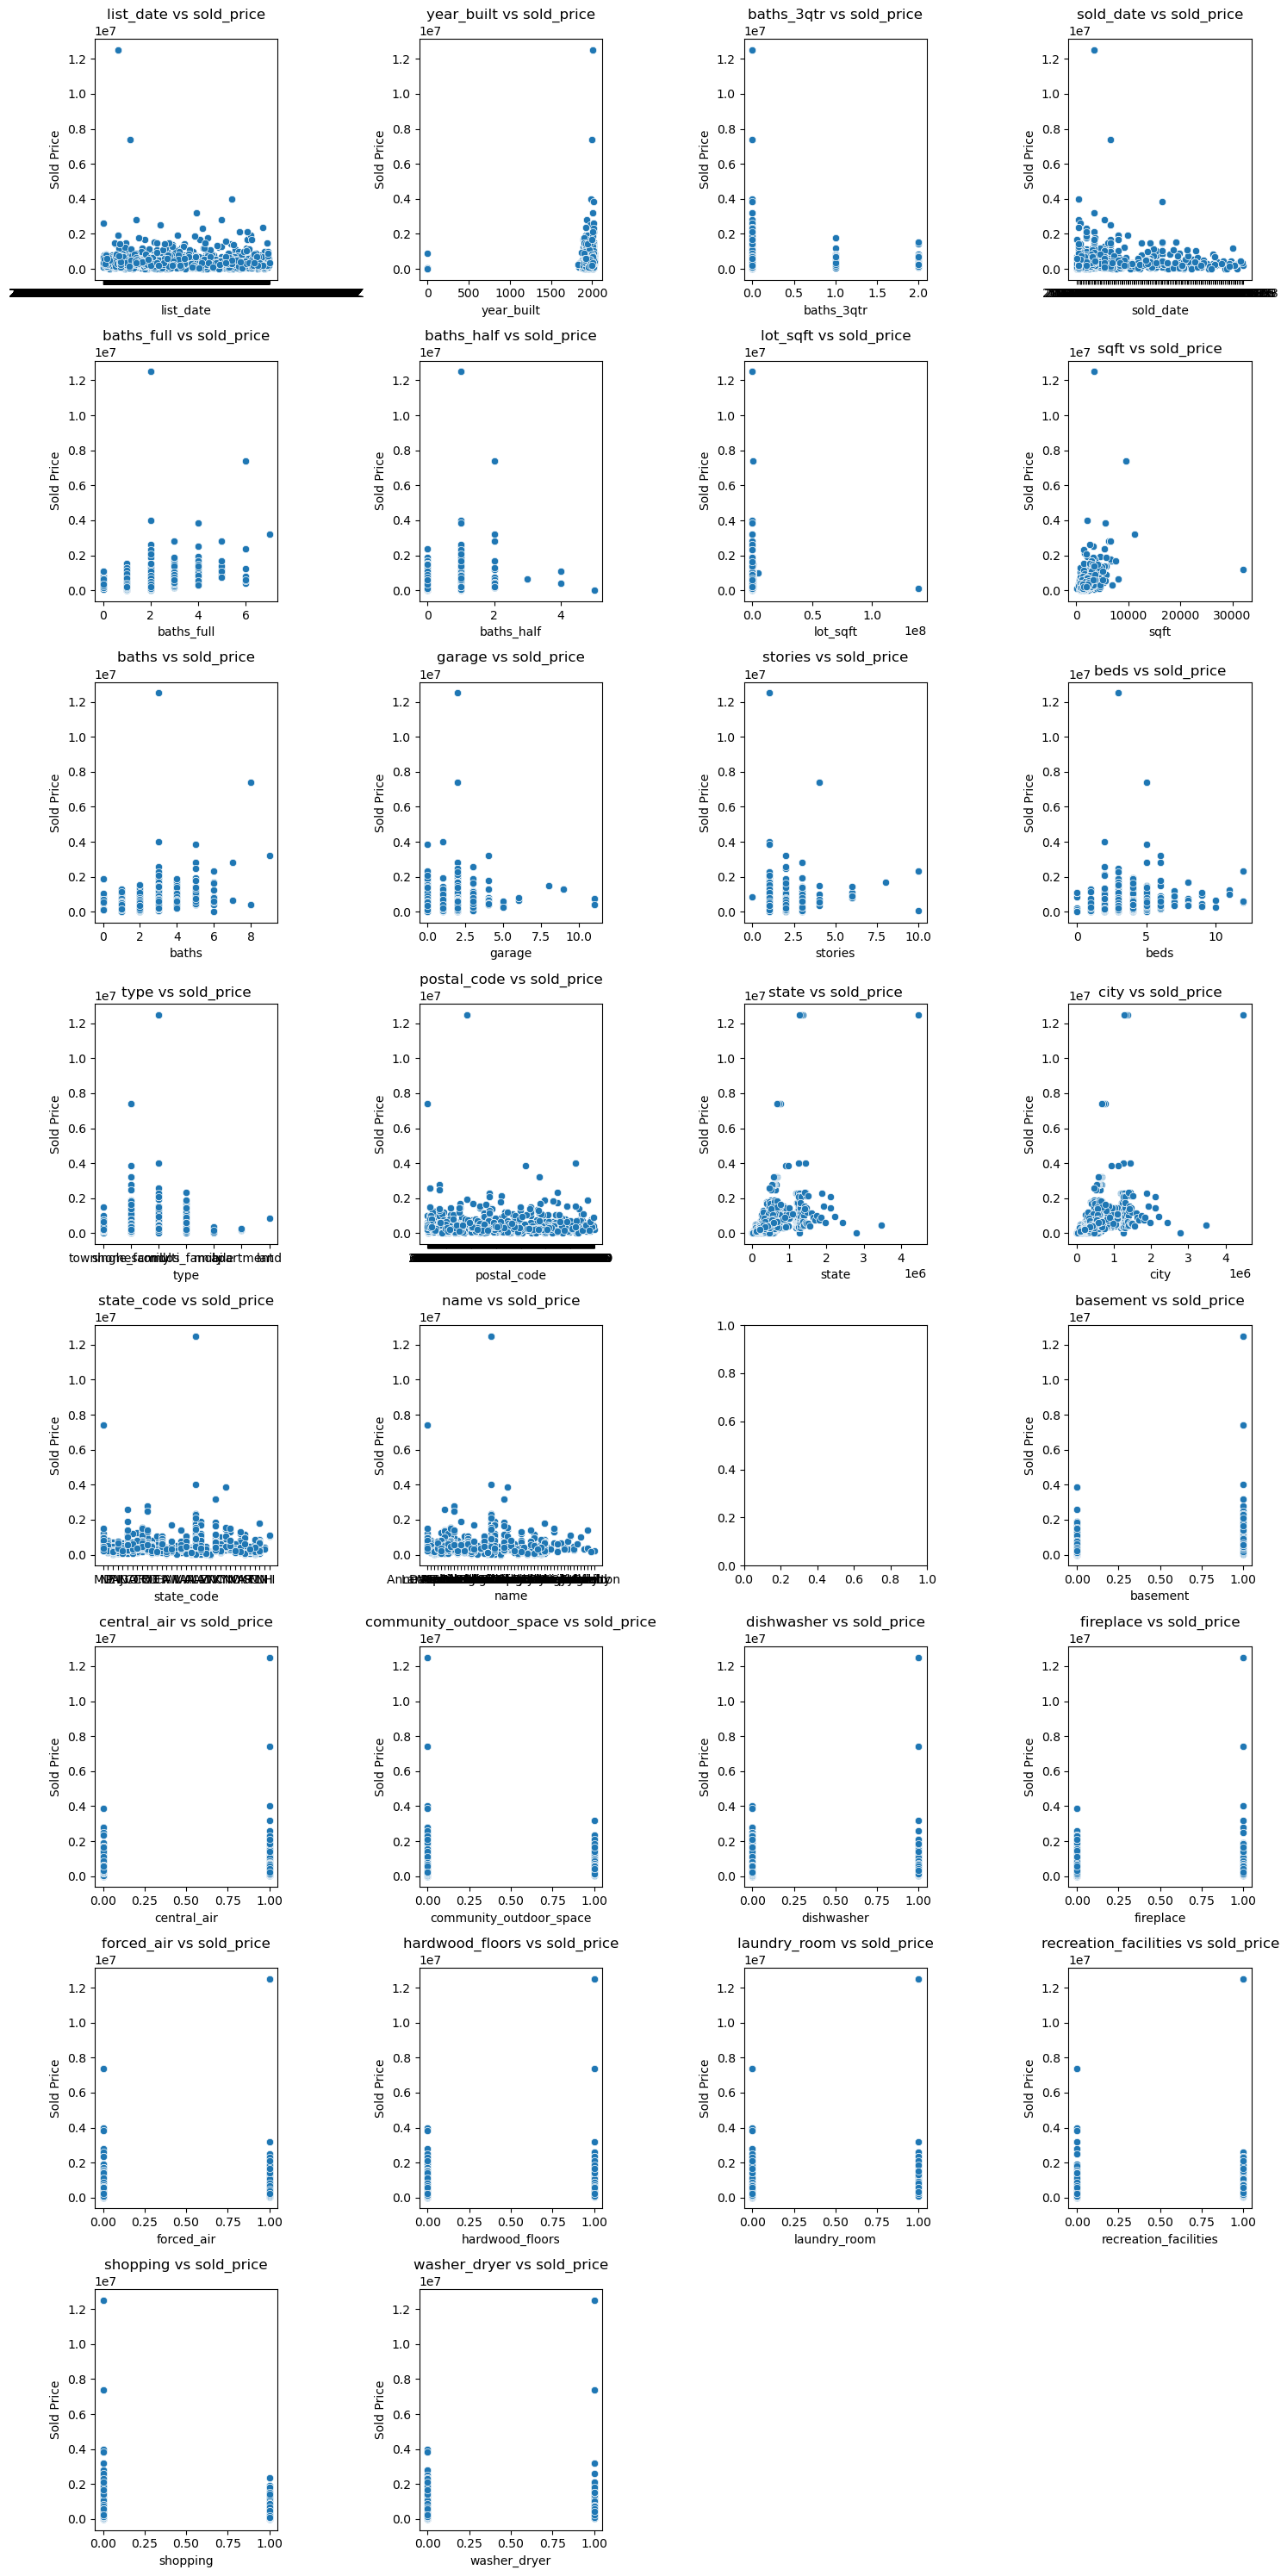

In [404]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Define subplot details
rows, cols = 8, 4 # 8 rows, 4 columns
total_plots = len(X_train.columns)
fig, axes = plt.subplots(rows, cols, figsize=[15,30])
axes = axes.flatten()

#Create scatterplots for all columns in the training set and the target variable
for i, column in enumerate(X_train.columns):
        #Filtered tags is not hashable, skip 
    if column=='filtered_tags':
        continue
    
    sns.scatterplot(x=X_train[column], y=y_train, ax=axes[i])
    col_name = column.split(".")[-1]
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel("Sold Price")
    axes[i].set_title(f"{col_name} vs sold_price")

# Hide any unused subplots (if features < 32)
for j in range(total_plots, rows * cols):
    fig.delaxes(axes[j])

#Show plots and avoid overlapping 
plt.tight_layout()  
plt.show()


## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized